## Convolutional Neural Networks - MNIST dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

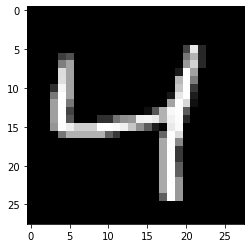

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2], cmap='gray')

In [7]:
y_train[2]

4

In [8]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [12]:
#create model
model = Sequential()

In [13]:
model.add(Conv2D(32, 
                 kernel_size=3,
                 activation='relu',
                 input_shape=(28,28,1)))

In [14]:
model.add(MaxPool2D(pool_size = 2))

In [15]:
model.add(Conv2D(32, 
                 kernel_size=3, 
                 activation='relu'))
model.add(MaxPool2D(pool_size = 2))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(128, activation = 'relu')) # Fully connected layer 1
model.add(Dense(64, activation = 'relu')) # Fully Connected Layer 2

In [18]:
model.add(Dense(10, activation='softmax')) # Output layer

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [20]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [21]:
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          epochs=3)

Epoch 1/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1599 - accuracy: 0.9506 - val_loss: 0.0755 - val_accuracy: 0.9746
Epoch 2/3
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.0513 - val_accuracy: 0.9852
Epoch 3/3
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0323 - val_accuracy: 0.9900


In [22]:
import numpy as np

In [24]:
model.predict(X_train)[0]

array([4.1001660e-10, 1.3823534e-06, 9.6202140e-09, 2.4712425e-02,
       7.7811635e-10, 9.7526270e-01, 6.8410017e-08, 1.5562676e-07,
       4.6087057e-06, 1.8588200e-05], dtype=float32)

In [26]:
y_train_pred = np.argmax(model.predict(X_train),axis=1)

In [27]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

Confusion Matrix
[[5908    0    0    0    0   10    2    0    3    0]
 [   1 6714    0    4   11    0    1   10    0    1]
 [   2    3 5909   15    4    1    1   11   12    0]
 [   0    0    1 6098    0   13    0    8    6    5]
 [   0    1    0    0 5825    0    0    6    3    7]
 [   0    0    0    4    2 5395    6    0   12    2]
 [   6    2    0    0   11    4 5883    0   12    0]
 [   0   11    2    4    3    0    0 6238    5    2]
 [   1    3    2    3    3   11    1    2 5824    1]
 [   8    1    0    1   51    8    0   22   33 5825]]


 Accuracy 0.99365


In [30]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

Confusion Matrix
[[ 976    0    0    1    0    1    0    1    1    0]
 [   0 1130    0    1    4    0    0    0    0    0]
 [   1    2 1017    2    4    0    0    5    1    0]
 [   0    0    1 1004    0    2    0    2    1    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   0    0    0    5    0  885    1    0    1    0]
 [   4    3    0    0    3    1  943    0    4    0]
 [   0    2    2    1    0    0    0 1020    1    2]
 [   1    0    2    0    0    0    0    2  969    0]
 [   1    3    0    2   12    3    0    6    7  975]]


 Accuracy 0.99
